In [1]:
from databases import Database
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
db = Database("sqlite:///./app/test.db")

In [3]:
query = """
            SELECT *
            FROM predictions
        """

In [4]:
rows = await db.fetch_all(query=query)

In [5]:
rows

[(2, 'testttt', '2021-04-29 00:00:00', 'Male', '0.0', 'No', 'No', '0.0', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', '45.0', '160', '0'),
 (3, 'testttt', '2021-04-17 21:00:00', 'Male', '0.0', 'No', 'No', '0.0', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', '0.0', '0.0', '1'),
 (4, 'testttt', '2023-04-24 00:00:00', 'Male', '0.0', 'No', 'No', '0.0', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', '12', '15.0', '0'),
 (5, 'testttt', '2023-04-20 00:00:00', 'Male', '0.0', 'No', 'No', '5', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', '5', '25', '1'),
 (6, 'testttt', '2023-04-27 00:00:00', 'Male', '0.0', 'No', 'No', '0.0', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', '22.0', '50', '0'),
 (7, 

In [6]:
# Load the data into a Pandas dataframe
df = pd.read_sql_query("SELECT * FROM predictions", "sqlite:///./app/test.db")

# Convert the requested_time column to a datetime data type
df['requested_time'] = pd.to_datetime(df['requested_time'])

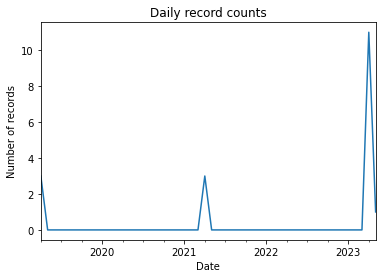

In [7]:
# Group the data by day
daily_counts = df.groupby(pd.Grouper(key='requested_time', freq='M')).size()

# Create a line plot of the daily counts
daily_counts.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of records')
plt.title('Daily record counts')
plt.show()

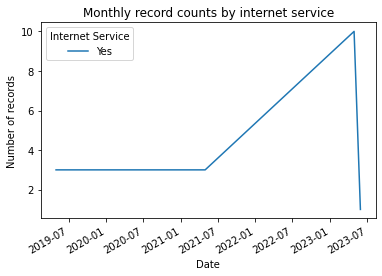

In [8]:
# Filter the data to include only records with internet service
internet_df = df[df['InternetService'] != 'No']

# Group the data by day and internet service
daily_counts = internet_df.groupby([pd.Grouper(key='requested_time', freq='M'), 'InternetService']).size()

# Plot the daily counts
daily_counts.unstack().plot(kind='line')

plt.xlabel('Date')
plt.ylabel('Number of records')
plt.title('Monthly record counts by internet service')
plt.legend(title='Internet Service', loc='upper left')
plt.show()

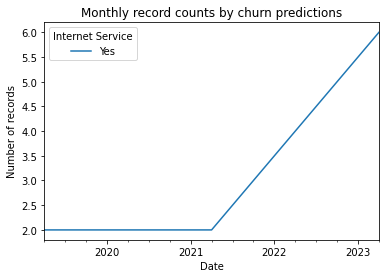

In [13]:
# Filter the data to include only records with internet service
internet_df = df[df['predictions'] == '1']

# Group the data by day and internet service
daily_counts = internet_df.groupby([pd.Grouper(key='requested_time', freq='M'), 'InternetService']).size()

# Plot the daily counts
daily_counts.unstack().plot(kind='line')

plt.xlabel('Date')
plt.ylabel('Number of records')
plt.title('Monthly record counts by churn predictions')
plt.legend(title='Internet Service', loc='upper left')
plt.show()